## Mean / Median imputation

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can be used to train machine learning models.

Mean / median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).

**Note the following**:

- If a variable is normally distributed, the mean, median and mode, are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent. Replacing missing data by the mode is not common practice for  numerical variables.
- If the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
- For discrete variables casted as 'int' (to save memory), the mean may not be an integer, therefore the whole variable will be re-casted as 'float'. In order to avoid this behaviour, we can replace NA with the median instead. The median will inevitably be an integer / discrete value as well.


### Which variables can I impute with Mean / Median Imputation?

The mean and median can only be calculated on numerical variables, therefore these methods are suitable for continuous and discrete numerical variables only.


### Assumptions

- Data is missing completely at random (MCAR)
- The missing observations, most likely look like the majority of the observations in the variable (aka, the mean / median)

If data is missing completely at random, then it is fair to assume that the missing values, are most likely very close to the value of the mean or the median of the distribution, as these represent the most frequent / average observation.


### Advantages

- Easy to implement
- Fast way of obtaining complete datasets
- Can be integrated in production (during model deployment)

### Limitations

- Distortion of the original variable distribution
- Distortion of the original variance
- Distortion of the covariance with the remaining variables of the dataset

When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations, leading to underestimation of the variance.

In addition, estimates of covariance and correlations with other variables in the dataset may also be affected. Mean / median imputation may alter intrinsic correlations since the mean / median value that now replaces the missing data will not necessarily preserve the relation with the remaining variables.

Finally, concentrating all missing values at the mean / median value, may lead to observations that are common occurrences in the distribution, to be picked up as outliers.


### When to use mean / median imputation?

- Data is missing completely at random
- No more than 5% of the variable contains missing data

Although in theory, the above conditions should be met to minimise the impact of this imputation technique, in practice, mean / median imputation is very commonly used, even in those cases when data is not MCAR and there are a lot of missing values. The reason behind this, is the simplicity of the technique.


### Final note

Replacement of NA with mean / median is widely used in the data science community and in various data science competitions. See for example the winning solution of the KDD 2009 cup: ["Winning the KDD Cup Orange Challenge with Ensemble Selection"]( http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

Typically, mean / median imputation is done together with adding a binary "missing indicator" variable to capture those observations where the data was missing (see lecture "Missing Indicator"), thus covering 2 angles: if the data was missing completely at random, this would be captured by the mean /median imputation, and if it wasn't this would be captured by the additional "missing indicator" variable. Both methods are extremely straight forward to implement, and therefore are a top choice in data science competitions.

## In this demo:

We will learn how to perform mean and median imputation using pandas on the Ames House Price and Titanic Datasets.

- To download the datasets please refer to the lecture **Datasets** in **Section 1** of this course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

## Titanic

In [2]:
# load the Titanic Dataset with a these few variables for demonstration (age,fare,survived)

data=pd.read_csv("titanic.csv", usecols=['age', 'fare', 'survived'])

# List 1st 5 rows
data.head(1)

,survived,age,fare
0,1,29.0,211.3375


In [3]:
# look at the percentage of NA
print(data.isnull().mean())
print(data.shape)

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64
(1309, 3)


The only variable with missing data is Age, with ~20% of missing observations.

### Imputation important

Imputation should be done over the training set, and then propagated to the test set. This means that the mean / median to be used to fill missing values both in train and test set, should be extracted from the train set only. And this is to avoid overfitting.

In [6]:
# let's separate into training and testing set
#هنا بنفصل الداتا بس لمجموعتين 
#test_size float or int, default=None
#If float, should be between 0.0 and 1.0 and
#represent the proportion of the dataset to include in the test split.
#If int, represents the absolute number of test samples. 
#If None, the value is set to the complement of the train size.
#If train_size is also None, it will be set to 0.25
#========
#random_stateint, RandomState instance or None, default=None
#Controls the shuffling applied to the data before applying the split.
#Pass an int for reproducible output across multiple function calls

X_train, X_test, y_train, y_test = train_test_split(
    data[['age', 'fare']],  # predictors
    data['survived'],  # target
    test_size=0.3,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

# print out the shape(dimensions) of X_train and X_test


In [7]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset
X_train.isnull().mean()

age     0.191048
fare    0.000000
dtype: float64

In [8]:
# let's make a function to fill missing values with the mean or median:
# the variable takes the dataframe, the variable, and the value of the
# mean or median
# and returns the variable with the filled na
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html
# fillna ==> Fill NA/NaN values using the specified method.

def impute_na(df, variable, mean_median):

    return df[variable].fillna(mean_median)

In [9]:
# calculate the median Age
# https://docs.python.org/3/library/statistics.html

median = X_train.age.median()
median

28.0

In [10]:
# calculate the mean Age
# https://docs.python.org/3/library/statistics.html

mean = X_train.age.mean()
mean

30.23144399460189

In [11]:
# create a new variable with the missing values replaced
# using the function we created above

# first replace 'age' with the median
X_train['Age_median'] = impute_na(X_train, 'age', median)

# now replace 'age' with the mean
X_train['Age_mean'] = impute_na(X_train, 'age', mean)

# the mean contains many decimals, so round to 1
# using the round function from numpy
# https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.round_.html
X_train['Age_mean'] = np.round(X_train['Age_mean'], 1)


# List 1st 15th row from X_train
X_train.head(1)

,age,fare,Age_median,Age_mean
501,13.0,19.5,13.0,13.0


Look at the rows with missing data (NaN) in Age, and see how in the new variables those were replaced by either 28 (median) or 30 (mean).

In [12]:
# we can see a change in the variance after mean / median imputation
# this is expected, because the percentage of missing data is quite
# high in Age, ~20%
# https://numpy.org/doc/stable/reference/generated/numpy.var.html

print('Original variable variance: ', X_train['age'].var())
print('Variance after median imputation: ', X_train['Age_median'].var())
print('Variance after mean imputation: ',X_train['Age_mean'].var())

Original variable variance:  194.16304666581854
Variance after median imputation:  157.7984295760209
Variance after mean imputation:  157.02170735199397


As expected, the variance is underestimated, because now many values are the same ==> either the mean or the median value.

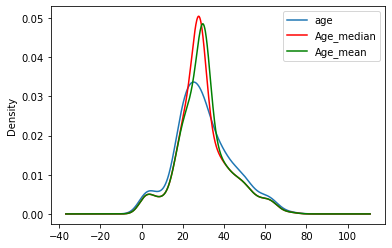

In [39]:
# we can see that the distribution has changed 
# with now more values accumulating towards the median
# or median

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot original variable distribution
# kde is used to generate Kernel Density Estimate plot 
# using Gaussian kernels  to estimate the probability density function (PDF) of a random variable.
X_train['age'].plot(kind='kde', ax=ax)

# Plot variable imputed with the median in red color
X_train['Age_median'].plot(kind='kde', ax=ax, color='red')

# Plot variable imputed with the mean in green color
X_train['Age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As mentioned above, the mean / median imputation distorts the original distribution of the variable Age. The transformed variable shows more values around the mean / median values.

**Is this important?**

It depends on the machine learning model you want to build. Linear models assume that the variables are normally distributed. Mean / median imputation may distort the original normal distribution if the % of missing data is high. Therefore the final imputed variable will no longer be normally distributed, which in turn may affect the linear model performance.

In [13]:
# we also said that mean / median imputation may affect the relationship 
# with the other variables in the dataset, let's have a look on the covariance
# Covariance indicates the direction of the linear relationship between variables.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cov.html

X_train[['fare', 'age', 'Age_median', 'Age_mean']].cov()

,fare,age,Age_median,Age_mean
fare,2248.326729,136.176223,114.961682,110.198311
age,136.176223,194.163047,194.163047,194.159033
Age_median,114.961682,194.163047,157.798430,157.035694
Age_mean,110.198311,194.159033,157.035694,157.021707


We see indeed that the covariance between Age and Fare is changed after the mean / median imputation.

<AxesSubplot:>

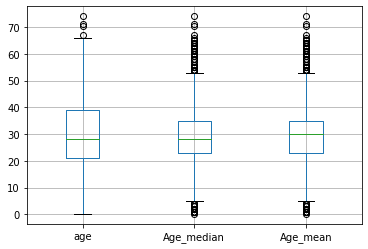

In [14]:
# Finally, I mentioned that mean / median imputation may lead 
# to observations that are normal, to look like outliers

# or in other words, mean / median imputation may lead to an increase
# in the apparent number of  outliers

# Let's find out using a boxplot
# A boxplot is a graph that gives you a good indication of how the values in the data are spread out. 
X_train[['age', 'Age_median', 'Age_mean']].boxplot()

From the boxplot above, we can see that after the imputation not only we have more outliers on the higher Age values, but we have now outliers as well for the lower values of Age.

**Is this important?**

If we are after true outliers, we need to keep this behaviour in mind, to make sure that we are neither masking nor creating artificial outliers with our imputation technique. In practice, we normally don't check for this behaviour at all. But I think it is important to know that is happening.

In [42]:
print('abelmaksoud')

abelmaksoud
